### Common Pandas Operations

We will use the data set from NYC OpenData called "New York City Leading Causes of Death".

In [3]:
# Data set: New York City Leading Causes of Death
# https://data.cityofnewyork.us/Health/New-York-City-Leading-Causes-of-Death/jb7j-dtam

%matplotlib inline
import requests
import json
import pandas as pd
import numpy as np
  

#### Fetching the data


We fetch the data in JSON format using the NYC OpenData API:

In [4]:
url = 'http://data.cityofnewyork.us/api/views/jb7j-dtam/rows.json'
results = requests.get(url).json()

In [5]:
results.keys()

dict_keys(['data', 'meta'])

There are two main fields in the returned JSON. The `meta` part that describes the metadata, and the actual `data`.

In [9]:
results['meta']['view'].keys()

dict_keys(['rights', 'indexUpdatedAt', 'provenance', 'owner', 'name', 'rowsUpdatedAt', 'query', 'tableId', 'hideFromDataJson', 'averageRating', 'columns', 'publicationDate', 'id', 'numberOfComments', 'attribution', 'rowsUpdatedBy', 'publicationGroup', 'viewCount', 'publicationStage', 'createdAt', 'category', 'oid', 'downloadCount', 'tags', 'viewLastModified', 'flags', 'description', 'newBackend', 'grants', 'publicationAppendEnabled', 'hideFromCatalog', 'displayType', 'totalTimesRated', 'tableAuthor', 'metadata', 'viewType'])

In [11]:
results['data']

[[1095,
  'EB649B90-D468-4471-A55B-8B66572E31F8',
  1095,
  1484932698,
  '399231',
  1484932698,
  '399231',
  None,
  '2014',
  'Diabetes Mellitus (E10-E14)',
  'F',
  'Other Race/ Ethnicity',
  '11',
  '.',
  '.'],
 [1096,
  '47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105',
  1096,
  1484932698,
  '399231',
  1484932698,
  '399231',
  None,
  '2011',
  'Cerebrovascular Disease (Stroke: I60-I69)',
  'M',
  'White Non-Hispanic',
  '290',
  '21.7',
  '18.2'],
 [1097,
  'FC47920F-22D9-415D-A4C2-463D3F8C918F',
  1097,
  1484932698,
  '399231',
  1484932698,
  '399231',
  None,
  '2008',
  'Malignant Neoplasms (Cancer: C00-C97)',
  'M',
  'Not Stated/Unknown',
  '60',
  '.',
  '.'],
 [1098,
  '3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB',
  1098,
  1484932698,
  '399231',
  1484932698,
  '399231',
  None,
  '2010',
  'Malignant Neoplasms (Cancer: C00-C97)',
  'F',
  'Hispanic',
  '1045',
  '85.9',
  '98.5'],
 [1099,
  'EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3',
  1099,
  1484932698,
  '399231',
  1484932698,


### Creating a DataFrame from JSON data

Let's create a pandas dataframe from the `results["data"]` part.

In [12]:
df = pd.DataFrame(results["data"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1095,EB649B90-D468-4471-A55B-8B66572E31F8,1095,1484932698,399231,1484932698,399231,None,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,1096,47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1096,1484932698,399231,1484932698,399231,None,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,1097,FC47920F-22D9-415D-A4C2-463D3F8C918F,1097,1484932698,399231,1484932698,399231,None,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,1098,3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1098,1484932698,399231,1484932698,399231,None,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,1099,EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1099,1484932698,399231,1484932698,399231,None,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3
5,1100,F7443025-16C5-43B0-9DCF-36C90CCCD940,1100,1484932698,399231,1484932698,399231,None,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,.,.,.
6,1101,6F808500-FAFF-42D8-B472-0F4CAC390CC8,1101,1484932698,399231,1484932698,399231,None,2011,All Other Causes,F,Not Stated/Unknown,14,.,.
7,1102,A62D3A16-7B84-4A91-A88C-EB0ADE91255E,1102,1484932698,399231,1484932698,399231,None,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163,15.5,14.8
8,1103,A886E4E1-B492-4ABC-A128-3EE5B961A30F,1103,1484932698,399231,1484932698,399231,None,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101,8.2,9.5
9,1104,7B18F633-7206-4193-AF6C-056B10D7AB00,1104,1484932698,399231,1484932698,399231,None,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9


### Adding Column Names

Hm, this is kind of ugly without column names...

We need to peek at the "meta" part to find information about the columns.

In [13]:
# This part of the results contains the description and names for the columns
columns = results["meta"]["view"]["columns"]
columns

[{'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'flags': ['hidden'],
  'format': {},
  'id': -1,
  'name': 'sid',
  'position': 0,
  'renderTypeName': 'meta_data'},
 {'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'flags': ['hidden'],
  'format': {},
  'id': -1,
  'name': 'id',
  'position': 0,
  'renderTypeName': 'meta_data'},
 {'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'flags': ['hidden'],
  'format': {},
  'id': -1,
  'name': 'position',
  'position': 0,
  'renderTypeName': 'meta_data'},
 {'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'flags': ['hidden'],
  'format': {},
  'id': -1,
  'name': 'created_at',
  'position': 0,
  'renderTypeName': 'meta_data'},
 {'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'flags': ['hidden'],
  'format': {},
  'id': -1,
  'name': 'created_meta',
  'position': 0,
  'renderTypeName': 'meta_data'},
 {'dataTypeName': 'meta_data',
  'fieldName': ':updated_at',
  'flags': ['hidden'],
  'format':

In [14]:
# We will create a list of the column names, to reuse it when creating our dataframe
headers = [c["fieldName"] for c in columns]
headers

[':sid',
 ':id',
 ':position',
 ':created_at',
 ':created_meta',
 ':updated_at',
 ':updated_meta',
 ':meta',
 'year',
 'leading_cause',
 'sex',
 'race_ethnicity',
 'deaths',
 'death_rate',
 'age_adjusted_death_rate']

In [15]:
# Now we also pass a list of column names
df = pd.DataFrame(results["data"], columns=headers)
df

,:sid,:id,:position,:created_at,:created_meta,:updated_at,:updated_meta,:meta,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,1095,EB649B90-D468-4471-A55B-8B66572E31F8,1095,1484932698,399231,1484932698,399231,None,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,1096,47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1096,1484932698,399231,1484932698,399231,None,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,1097,FC47920F-22D9-415D-A4C2-463D3F8C918F,1097,1484932698,399231,1484932698,399231,None,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,1098,3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1098,1484932698,399231,1484932698,399231,None,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,1099,EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1099,1484932698,399231,1484932698,399231,None,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3
5,1100,F7443025-16C5-43B0-9DCF-36C90CCCD940,1100,1484932698,399231,1484932698,399231,None,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,.,.,.
6,1101,6F808500-FAFF-42D8-B472-0F4CAC390CC8,1101,1484932698,399231,1484932698,399231,None,2011,All Other Causes,F,Not Stated/Unknown,14,.,.
7,1102,A62D3A16-7B84-4A91-A88C-EB0ADE91255E,1102,1484932698,399231,1484932698,399231,None,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163,15.5,14.8
8,1103,A886E4E1-B492-4ABC-A128-3EE5B961A30F,1103,1484932698,399231,1484932698,399231,None,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101,8.2,9.5
9,1104,7B18F633-7206-4193-AF6C-056B10D7AB00,1104,1484932698,399231,1484932698,399231,None,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9


### Deleting Columns and/or Rows

We do not need all these columns. Let's drop a few that we will definitely not use. For that, we will use the `drop` command

In [17]:
df.drop(labels = [':sid', ':position', ':meta', ':created_meta', ':updated_meta'], 
        axis=1, inplace=True)
df

ValueError: labels [':sid' ':position' ':meta' ':created_meta' ':updated_meta'] not contained in axis

##### Common Patterns: axis and inplace

* The `axis=1` says that we are looking to drop columns. If we had "axis=0" we would be dropping rows with the passed id's. The ids for the row is the index value for the row.

* The `inplace=True` specifies that we will not be creating a new dataframe, but we just replace the current one, with the new dataframe that has fewer columns.

In [18]:
df

,:id,:created_at,:updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,EB649B90-D468-4471-A55B-8B66572E31F8,1484932698,1484932698,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1484932698,1484932698,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,FC47920F-22D9-415D-A4C2-463D3F8C918F,1484932698,1484932698,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1484932698,1484932698,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1484932698,1484932698,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3
5,F7443025-16C5-43B0-9DCF-36C90CCCD940,1484932698,1484932698,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,.,.,.
6,6F808500-FAFF-42D8-B472-0F4CAC390CC8,1484932698,1484932698,2011,All Other Causes,F,Not Stated/Unknown,14,.,.
7,A62D3A16-7B84-4A91-A88C-EB0ADE91255E,1484932698,1484932698,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163,15.5,14.8
8,A886E4E1-B492-4ABC-A128-3EE5B961A30F,1484932698,1484932698,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101,8.2,9.5
9,7B18F633-7206-4193-AF6C-056B10D7AB00,1484932698,1484932698,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9


### Renaming Columns

We do not like some of these column names. Let's rename them.

We will use a dictionary, for specifying the existing and the new names for the columns.

In [19]:
# This dictionary specifies as a key the existing name of the column, and as value the new name
renaming_dict = {
    ':id': 'key', 
    ':created_at': 'created_at', 
    ':updated_at': 'updated_at'
}

df.rename(columns=renaming_dict, inplace=True)
df

,key,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,EB649B90-D468-4471-A55B-8B66572E31F8,1484932698,1484932698,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
1,47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1484932698,1484932698,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
2,FC47920F-22D9-415D-A4C2-463D3F8C918F,1484932698,1484932698,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3,3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1484932698,1484932698,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
4,EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1484932698,1484932698,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3
5,F7443025-16C5-43B0-9DCF-36C90CCCD940,1484932698,1484932698,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,.,.,.
6,6F808500-FAFF-42D8-B472-0F4CAC390CC8,1484932698,1484932698,2011,All Other Causes,F,Not Stated/Unknown,14,.,.
7,A62D3A16-7B84-4A91-A88C-EB0ADE91255E,1484932698,1484932698,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163,15.5,14.8
8,A886E4E1-B492-4ABC-A128-3EE5B961A30F,1484932698,1484932698,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101,8.2,9.5
9,7B18F633-7206-4193-AF6C-056B10D7AB00,1484932698,1484932698,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9


### Creating a row index

We can specify that the "key" column is the primary key for the table

In [20]:
df.set_index(keys="key", inplace=True)
df

,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
key,,,,,,,,,
EB649B90-D468-4471-A55B-8B66572E31F8,1484932698,1484932698,2014,Diabetes Mellitus (E10-E14),F,Other Race/ Ethnicity,11,.,.
47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1484932698,1484932698,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
FC47920F-22D9-415D-A4C2-463D3F8C918F,1484932698,1484932698,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1484932698,1484932698,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1484932698,1484932698,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3
F7443025-16C5-43B0-9DCF-36C90CCCD940,1484932698,1484932698,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,.,.,.
6F808500-FAFF-42D8-B472-0F4CAC390CC8,1484932698,1484932698,2011,All Other Causes,F,Not Stated/Unknown,14,.,.
A62D3A16-7B84-4A91-A88C-EB0ADE91255E,1484932698,1484932698,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163,15.5,14.8
A886E4E1-B492-4ABC-A128-3EE5B961A30F,1484932698,1484932698,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101,8.2,9.5


In [21]:
# Delete the line with key value EB649B90-D468-4471-A55B-8B66572E31F8
df.drop(labels = ['EB649B90-D468-4471-A55B-8B66572E31F8'], axis=0, inplace=True)
df

,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
key,,,,,,,,,
47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1484932698,1484932698,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290,21.7,18.2
FC47920F-22D9-415D-A4C2-463D3F8C918F,1484932698,1484932698,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60,.,.
3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1484932698,1484932698,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045,85.9,98.5
EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1484932698,1484932698,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170,19.9,23.3
F7443025-16C5-43B0-9DCF-36C90CCCD940,1484932698,1484932698,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,.,.,.
6F808500-FAFF-42D8-B472-0F4CAC390CC8,1484932698,1484932698,2011,All Other Causes,F,Not Stated/Unknown,14,.,.
A62D3A16-7B84-4A91-A88C-EB0ADE91255E,1484932698,1484932698,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163,15.5,14.8
A886E4E1-B492-4ABC-A128-3EE5B961A30F,1484932698,1484932698,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101,8.2,9.5
7B18F633-7206-4193-AF6C-056B10D7AB00,1484932698,1484932698,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382,123.1,227.9


### Converting Data Types

In [22]:
df.dtypes

created_at                  int64
updated_at                  int64
year                       object
leading_cause              object
sex                        object
race_ethnicity             object
deaths                     object
death_rate                 object
age_adjusted_death_rate    object
dtype: object

In [23]:
# Let's convert to the right data types the year,count,percent
df["year"] = pd.to_numeric(df["year"])
df.dtypes

created_at                  int64
updated_at                  int64
year                        int64
leading_cause              object
sex                        object
race_ethnicity             object
deaths                     object
death_rate                 object
age_adjusted_death_rate    object
dtype: object

Sometimes, during the conversion of data, the cells contain values that cannot be properly converted. We can specify how we want pandas to handle such cases. By default, it will raise an exception, and will not allow us to convert the data to a new data type.

In [24]:
# This one will cause an error, as the "deaths" column contains non-numeric values.
df["deaths"] = pd.to_numeric(df["deaths"])

ValueError: Unable to parse string "." at position 4

We can pass the `errors` command to specify what should happen. From the [documentation of to_numeric](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html), we get:
* If ‘raise’, then invalid parsing will raise an exception
* If ‘coerce’, then invalid parsing will be set as NaN
* If ‘ignore’, then invalid parsing will return the input

In [25]:
df["deaths"] = pd.to_numeric(df["deaths"], errors='coerce')
df["death_rate"] = pd.to_numeric(df["death_rate"], errors='coerce')
df["age_adjusted_death_rate"] = pd.to_numeric(df["age_adjusted_death_rate"], errors='coerce')
df.dtypes

created_at                   int64
updated_at                   int64
year                         int64
leading_cause               object
sex                         object
race_ethnicity              object
deaths                     float64
death_rate                 float64
age_adjusted_death_rate    float64
dtype: object

In [26]:
df

,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
key,,,,,,,,,
47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,1484932698,1484932698,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290.0,21.7,18.2
FC47920F-22D9-415D-A4C2-463D3F8C918F,1484932698,1484932698,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60.0,NaN,NaN
3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,1484932698,1484932698,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045.0,85.9,98.5
EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,1484932698,1484932698,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170.0,19.9,23.3
F7443025-16C5-43B0-9DCF-36C90CCCD940,1484932698,1484932698,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,NaN,NaN,NaN
6F808500-FAFF-42D8-B472-0F4CAC390CC8,1484932698,1484932698,2011,All Other Causes,F,Not Stated/Unknown,14.0,NaN,NaN
A62D3A16-7B84-4A91-A88C-EB0ADE91255E,1484932698,1484932698,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163.0,15.5,14.8
A886E4E1-B492-4ABC-A128-3EE5B961A30F,1484932698,1484932698,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101.0,8.2,9.5
7B18F633-7206-4193-AF6C-056B10D7AB00,1484932698,1484932698,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382.0,123.1,227.9


We will also mark the other values as Categorical.

In [27]:
df["sex"] = pd.Categorical(df["sex"])
df["race_ethnicity"] = pd.Categorical(df["race_ethnicity"])
df["leading_cause"] = pd.Categorical(df["leading_cause"])
df.dtypes

created_at                    int64
updated_at                    int64
year                          int64
leading_cause              category
sex                        category
race_ethnicity             category
deaths                      float64
death_rate                  float64
age_adjusted_death_rate     float64
dtype: object

And we will also convert the timestamps to dates. Notice that we specify the unit to be `s` which is seconds since 1970.

In [28]:
df["created_at"] = pd.to_datetime(df["created_at"], unit='s')
df["updated_at"] = pd.to_datetime(df["updated_at"], unit='s')
df.dtypes

created_at                 datetime64[ns]
updated_at                 datetime64[ns]
year                                int64
leading_cause                    category
sex                              category
race_ethnicity                   category
deaths                            float64
death_rate                        float64
age_adjusted_death_rate           float64
dtype: object

In [29]:
df

,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
key,,,,,,,,,
47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,2017-01-20 17:18:18,2017-01-20 17:18:18,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290.0,21.7,18.2
FC47920F-22D9-415D-A4C2-463D3F8C918F,2017-01-20 17:18:18,2017-01-20 17:18:18,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60.0,NaN,NaN
3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,2017-01-20 17:18:18,2017-01-20 17:18:18,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045.0,85.9,98.5
EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,2017-01-20 17:18:18,2017-01-20 17:18:18,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170.0,19.9,23.3
F7443025-16C5-43B0-9DCF-36C90CCCD940,2017-01-20 17:18:18,2017-01-20 17:18:18,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,NaN,NaN,NaN
6F808500-FAFF-42D8-B472-0F4CAC390CC8,2017-01-20 17:18:18,2017-01-20 17:18:18,2011,All Other Causes,F,Not Stated/Unknown,14.0,NaN,NaN
A62D3A16-7B84-4A91-A88C-EB0ADE91255E,2017-01-20 17:18:18,2017-01-20 17:18:18,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163.0,15.5,14.8
A886E4E1-B492-4ABC-A128-3EE5B961A30F,2017-01-20 17:18:18,2017-01-20 17:18:18,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101.0,8.2,9.5
7B18F633-7206-4193-AF6C-056B10D7AB00,2017-01-20 17:18:18,2017-01-20 17:18:18,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382.0,123.1,227.9


### Exploratory Data Analysis

In [30]:
df["race_ethnicity"].value_counts()

Not Stated/Unknown            200
Other Race/ Ethnicity         185
Black Non-Hispanic            178
Hispanic                      177
Asian and Pacific Islander    177
White Non-Hispanic            176
Name: race_ethnicity, dtype: int64

In [31]:
df["sex"].value_counts()

F    553
M    540
Name: sex, dtype: int64

In [32]:
df["leading_cause"].value_counts()

Diseases of Heart (I00-I09, I11, I13, I20-I51)                                                                                       96
Malignant Neoplasms (Cancer: C00-C97)                                                                                                96
All Other Causes                                                                                                                     96
Influenza (Flu) and Pneumonia (J09-J18)                                                                                              96
Diabetes Mellitus (E10-E14)                                                                                                          91
Cerebrovascular Disease (Stroke: I60-I69)                                                                                            90
Chronic Lower Respiratory Diseases (J40-J47)                                                                                         88
Accidents Except Drug Posioning (V01-X39, X43, X

### Pivot Tables

Let's create a pivot table now. We are going to put the "leading cause" as the row, with sex and race as columns. For the cell values we will use the number of deaths, and we are going to sum (`np.sum`) the values.

_Note: You will also find the `pivot` and `crosstab` functions in Pandas. The `pivot_table` function is typically a more general version of both._

In [34]:

import numpy as np
pivot = pd.pivot_table(df, 
                       values='deaths', 
                       index=['leading_cause'], # rows
                       columns=['sex', 'race_ethnicity'], # columns
                       aggfunc=np.mean) # aggregation function
pivot

sex                                                                         F  \
race_ethnicity                                     Asian and Pacific Islander   
leading_cause                                                                   
Accidents Except Drug Posioning (V01-X39, X43, ...                  35.500000   
All Other Causes                                                   264.750000   
Alzheimer's Disease (G30)                                           21.333333   
Aortic Aneurysm and Dissection (I71)                                      NaN   
Assault (Homicide: Y87.1, X85-Y09)                                        NaN   
Atherosclerosis (I70)                                                     NaN   
Cerebrovascular Disease (Stroke: I60-I69)                           84.625000   
Certain Conditions originating in the Perinatal...                  18.000000   
Chronic Liver Disease and Cirrhosis (K70, K73)                            NaN   
Chronic Lower Respiratory Diseases (J40-J47)                        31.125000   
Congenital Malformations, Deformations, and Chr...                        NaN   
Diabetes Mellitus (E10-E14)                                         50.625000   
Diseases of Heart (I00-I09, I11, I13, I20-I51)                     428.625000   
Essential Hypertension and Renal Diseases (I10,...                  33.625000   
Human Immunodeficiency Virus Disease (HIV: B20-...                        NaN   
Influenza (Flu) and Pneumonia (J09-J18)                             75.375000   
Insitu or Benign / Uncertain Neoplasms (D00-D48)                          NaN   
Intentional Self-Harm (Suicide: X60-X84, Y87.0)                     23.428571   
Malignant Neoplasms (Cancer: C00-C97)                              429.000000   
Mental and Behavioral Disorders due to Accident...                        NaN   
Mental and Behavioral Disorders due to Use of A...                        NaN   
Nephritis, Nephrotic Syndrome and Nephrisis (N0...                  16.000000   
Parkinson's Disease (G20)                                                 NaN   
Septicemia (A40-A41)                                                16.000000   
Tuberculosis (A16-A19)                                                    NaN   
Viral Hepatitis (B15-B19)                                           15.000000   

sex                                                                    \
race_ethnicity                                     Black Non-Hispanic   
leading_cause                                                           
Accidents Except Drug Posioning (V01-X39, X43, ...          78.500000   
All Other Causes                                          1397.250000   
Alzheimer's Disease (G30)                                  100.166667   
Aortic Aneurysm and Dissection (I71)                              NaN   
Assault (Homicide: Y87.1, X85-Y09)                                NaN   
Atherosclerosis (I70)                                             NaN   
Cerebrovascular Disease (Stroke: I60-I69)                  268.375000   
Certain Conditions originating in the Perinatal...                NaN   
Chronic Liver Disease and Cirrhosis (K70, K73)                    NaN   
Chronic Lower Respiratory Diseases (J40-J47)               206.375000   
Congenital Malformations, Deformations, and Chr...                NaN   
Diabetes Mellitus (E10-E14)                                391.625000   
Diseases of Heart (I00-I09, I11, I13, I20-I51)            2416.875000   
Essential Hypertension and Renal Diseases (I10,...         215.375000   
Human Immunodeficiency Virus Disease (HIV: B20-...         165.500000   
Influenza (Flu) and Pneumonia (J09-J18)                    286.000000   
Insitu or Benign / Uncertain Neoplasms (D00-D48)                  NaN   
Intentional Self-Harm (Suicide: X60-X84, Y87.0)                   NaN   
Malignant Neoplasms (Cancer: C00-C97)                     1815.625000   
Mental and Behavioral Disorders due to Accid

And we can easily transpose the dataframe

In [38]:
pivot.transpose()

leading_cause                   Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)  \
sex race_ethnicity                                                                                 
F   Asian and Pacific Islander                                          35.500000                  
    Black Non-Hispanic                                                  78.500000                  
    Hispanic                                                            62.428571                  
    Not Stated/Unknown                                                        NaN                  
    Other Race/ Ethnicity                                                6.000000                  
    White Non-Hispanic                                                 174.000000                  
M   Asian and Pacific Islander                                          57.875000                  
    Black Non-Hispanic                                                 149.142857                  
    Hispanic                                                           172.250000                  
    Not Stated/Unknown                                                  11.600000                  
    Other Race/ Ethnicity                                                7.000000                  
    White Non-Hispanic                                                 275.750000                  

leading_cause                   All Other Causes  Alzheimer's Disease (G30)  \
sex race_ethnicity                                                            
F   Asian and Pacific Islander           264.750                  21.333333   
    Black Non-Hispanic                  1397.250                 100.166667   
    Hispanic                             979.750                 100.833333   
    Not Stated/Unknown                    38.375                   8.000000   
    Other Race/ Ethnicity                 28.750                        NaN   
    White Non-Hispanic                  2159.000                 212.750000   
M   Asian and Pacific Islander           309.875                        NaN   
    Black Non-Hispanic                  1278.500                        NaN   
    Hispanic                            1135.625                        NaN   
    Not Stated/Unknown                    68.500                        NaN   
    Other Race/ Ethnicity                 30.250                        NaN   
    White Non-Hispanic                  2059.250                        NaN   

leading_cause                   Aortic Aneurysm and Dissection (I71)  \
sex race_ethnicity                                                     
F   Asian and Pacific Islander                                   NaN   
    Black Non-Hispanic                                           NaN   
    Hispanic                                                     NaN   
    Not Stated/Unknown                                           NaN   
    Other Race/ Ethnicity                                        NaN   
    White Non-Hispanic                                           NaN   
M   Asian and Pacific Islander                                   NaN   
    Black Non-Hispanic                                           NaN   
    Hispanic                                                     NaN   
    Not Stated/Unknown                                           NaN   
    Other Race/ Ethnicity                                        NaN   
    White Non-Hispanic                                           NaN   

leading_cause                   Assault (Homicide: Y87.1, X85-Y09)  \
sex race_ethnicity                                                   
F   Asian and Pacific Islander                                 NaN   
    Black Non-Hispanic                                         NaN   
    Hispanic                                                   NaN   
    Not Stated/Unknown                                         NaN   
    Other Race/ Ethnicity                                      

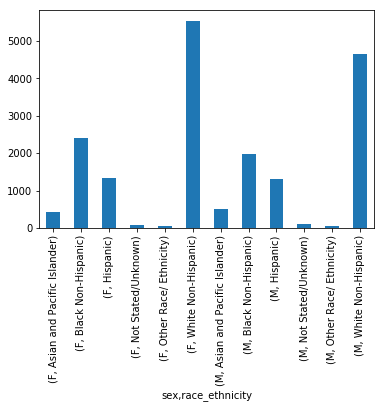

In [39]:
# And we can of course, plot:
pivot.transpose()["Diseases of Heart (I00-I09, I11, I13, I20-I51)"].plot.bar()

#### Exercises

* Write a function that will change the values for the "leading cause" column, and make them shorter. For example, we want to eliminate the codes within the parentheses; the value "Alzheimer's Disease (G30)" should become "Alzheimer's Disease". Use the `apply` function and/or the `map` function to create a new column with the shortened values. Then use the `drop` command to delete the old `leading_cause` column. 
* Change the pivot_table to compute the average `age_adjusted_death_rate` instead of the sum of deaths. (Hint: you can use the `numpy.mean` function to compute averages.

In [57]:
# Example input: 
# 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)
# Example output
# 'Accidents Except Drug Posioning'
import re

def shorten(cause):
    # Get everything before the parentheses
    regex_expression = r'(.*)\(.*\)' # notice that we escape the parentheses
    regex= re.compile(regex_expression)
    matches = regex.finditer(cause)
    for m in matches:
        return m.group(1).strip()[:30]
    return cause[:30]

shorten('Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)')

'Accidents Except Drug Posionin'

In [58]:
[shorten(cause) for cause in set(df['leading_cause'].values)]

['Nephritis, Nephrotic Syndrome ',
 'Diseases of Heart',
 'Influenza (Flu) and Pneumonia',
 'Aortic Aneurysm and Dissection',
 'Congenital Malformations, Defo',
 'Mental and Behavioral Disorder',
 'Assault',
 'Essential Hypertension and Ren',
 'Malignant Neoplasms',
 'Tuberculosis',
 'Diabetes Mellitus',
 'Chronic Liver Disease and Cirr',
 'All Other Causes',
 'Chronic Lower Respiratory Dise',
 'Atherosclerosis',
 'Insitu or Benign / Uncertain N',
 "Parkinson's Disease",
 'Certain Conditions originating',
 'Human Immunodeficiency Virus D',
 'Cerebrovascular Disease',
 "Alzheimer's Disease",
 'Accidents Except Drug Posionin',
 'Viral Hepatitis',
 'Mental and Behavioral Disorder',
 'Septicemia',
 'Intentional Self-Harm']

In [61]:
df["cause"] = df["leading_cause"].apply(shorten)
df

,created_at,updated_at,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate,cause
key,,,,,,,,,,
47B92A6A-2EB4-48B3-A7F4-0AF00EBE4105,2017-01-20 17:18:18,2017-01-20 17:18:18,2011,Cerebrovascular Disease (Stroke: I60-I69),M,White Non-Hispanic,290.0,21.7,18.2,Cerebrovascular Disease
FC47920F-22D9-415D-A4C2-463D3F8C918F,2017-01-20 17:18:18,2017-01-20 17:18:18,2008,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,60.0,NaN,NaN,Malignant Neoplasms
3CF03BB4-BB37-4E6D-9E41-F7C36EDAD1FB,2017-01-20 17:18:18,2017-01-20 17:18:18,2010,Malignant Neoplasms (Cancer: C00-C97),F,Hispanic,1045.0,85.9,98.5,Malignant Neoplasms
EE1E1741-4019-46A3-BEDC-6EC23ED4CAB3,2017-01-20 17:18:18,2017-01-20 17:18:18,2012,Cerebrovascular Disease (Stroke: I60-I69),M,Black Non-Hispanic,170.0,19.9,23.3,Cerebrovascular Disease
F7443025-16C5-43B0-9DCF-36C90CCCD940,2017-01-20 17:18:18,2017-01-20 17:18:18,2007,Mental and Behavioral Disorders due to Use of ...,M,Not Stated/Unknown,NaN,NaN,NaN,Mental and Behavioral Disorder
6F808500-FAFF-42D8-B472-0F4CAC390CC8,2017-01-20 17:18:18,2017-01-20 17:18:18,2011,All Other Causes,F,Not Stated/Unknown,14.0,NaN,NaN,All Other Causes
A62D3A16-7B84-4A91-A88C-EB0ADE91255E,2017-01-20 17:18:18,2017-01-20 17:18:18,2007,Chronic Lower Respiratory Diseases (J40-J47),F,Black Non-Hispanic,163.0,15.5,14.8,Chronic Lower Respiratory Dise
A886E4E1-B492-4ABC-A128-3EE5B961A30F,2017-01-20 17:18:18,2017-01-20 17:18:18,2012,Essential Hypertension and Renal Diseases (I10...,F,Hispanic,101.0,8.2,9.5,Essential Hypertension and Ren
7B18F633-7206-4193-AF6C-056B10D7AB00,2017-01-20 17:18:18,2017-01-20 17:18:18,2009,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",M,Hispanic,1382.0,123.1,227.9,Diseases of Heart


In [66]:

import numpy as np
pivot = pd.pivot_table(df, 
                       values='deaths', 
                       index=['cause'], # rows
                       columns=['sex', 'race_ethnicity'], # columns
                       aggfunc=np.mean) # aggregation function
pivot

sex                                                     F                     \
race_ethnicity                 Asian and Pacific Islander Black Non-Hispanic   
cause                                                                          
Accidents Except Drug Posionin                  35.500000          78.500000   
All Other Causes                               264.750000        1397.250000   
Alzheimer's Disease                             21.333333         100.166667   
Aortic Aneurysm and Dissection                        NaN                NaN   
Assault                                               NaN                NaN   
Atherosclerosis                                       NaN                NaN   
Cerebrovascular Disease                         84.625000         268.375000   
Certain Conditions originating                  18.000000                NaN   
Chronic Liver Disease and Cirr                        NaN                NaN   
Chronic Lower Respiratory Dise                  31.125000         206.375000   
Congenital Malformations, Defo                        NaN                NaN   
Diabetes Mellitus                               50.625000         391.625000   
Diseases of Heart                              428.625000        2416.875000   
Essential Hypertension and Ren                  33.625000         215.375000   
Human Immunodeficiency Virus D                        NaN         165.500000   
Influenza (Flu) and Pneumonia                   75.375000         286.000000   
Insitu or Benign / Uncertain N                        NaN                NaN   
Intentional Self-Harm                           23.428571                NaN   
Malignant Neoplasms                            429.000000        1815.625000   
Mental and Behavioral Disorder                        NaN          87.000000   
Nephritis, Nephrotic Syndrome                   16.000000          82.000000   
Parkinson's Disease                                   NaN                NaN   
Septicemia                                      16.000000          89.000000   
Tuberculosis                                          NaN                NaN   
Viral Hepatitis                                 15.000000                NaN   

sex                                                             \
race_ethnicity                     Hispanic Not Stated/Unknown   
cause                                                            
Accidents Except Drug Posionin    62.428571                NaN   
All Other Causes                 979.750000          38.375000   
Alzheimer's Disease              100.833333           8.000000   
Aortic Aneurysm and Dissection          NaN                NaN   
Assault                                 NaN                NaN   
Atherosclerosis                         NaN                NaN   
Cerebrovascular Disease          178.500000          10.200000   
Certain Conditions originating          NaN           9.166667   
Chronic Liver Disease and Cirr    61.000000                NaN   
Chronic Lower Respiratory Dise   157.250000           7.571429   
Congenital Malformations, Defo          NaN           8.000000   
Diabetes Mellitus                211.625000          10.333333   
Diseases of Heart               1328.750000          86.375000   
Essential Hypertension and Ren    95.500000           5.500000   
Human Immunodeficiency Virus D    93.400000           6.000000   
Influenza (Flu) and Pneumonia    213.750000          12.333333   
Insitu or Benign / Uncertain N          NaN           5.000000   
Intentional Self-Harm                   NaN                NaN   
Malignant Neoplasms             1083.750000          43.500000   
Mental and Behavioral Disorder    58.666667           6.000000   
Nephritis, Nephrotic Syndrome           NaN                NaN   
Parkinson's Disease                     NaN                NaN   
Septicemia                        49.000000                NaN   
Tuberculosis                            NaN

#### Exercise

* Get a new dataset from NYC Open Data. (Go for something small.) Fetch it and load it into a dataframe. Put the right column names into the dataframe, eliminate columns and rows that you do not need. Create a basic plot that summarizes some aspect of the dataset.